# Model Evaluation

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [12]:
from copy import copy

def clean_appended_history(prog_df):
    test_df = copy(prog_df)

    excludes = prog_df.columns
    excludes

    [test_df.replace(ex, np.NaN, inplace=True) for ex in excludes]
    test_df.dropna(inplace=True)
    test_df.pop('time')
    test_df = test_df.applymap(float)
    test_df['epoch'] = list(range(len(test_df)))
    test_df.reset_index().set_index('index')
    return test_df

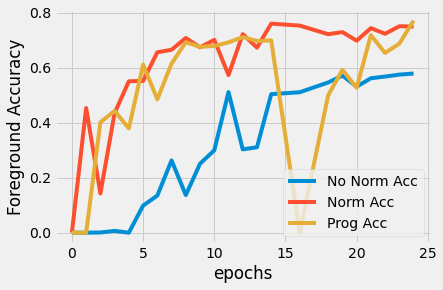

In [13]:
no_norm_df = pd.read_csv('no_norm_history.csv')
norm_df = pd.read_csv('norm_history.csv')
prog_df = clean_appended_history(pd.read_csv('prog_history.csv'))
df = pd.DataFrame({'No Norm Acc': no_norm_df['foreground_acc'], 'Norm Acc': norm_df['foreground_acc'], 'Prog Acc': prog_df['foreground_acc']})

df.dropna(inplace=True)
df.plot(xlabel='epochs', ylabel='Foreground Accuracy')
plt.show()

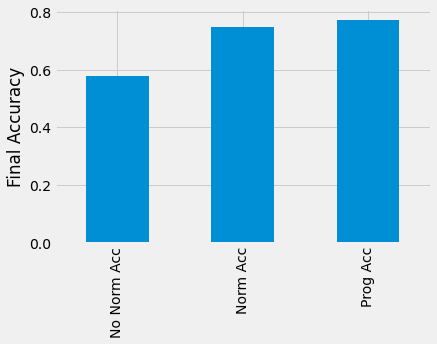

In [14]:
final_acc_df = df.iloc[-1,:]
final_acc_df.plot(kind='bar', ylabel='Final Accuracy')
plt.savefig('accuracy_comparison.png')